In this notebook, we'll dive deep into how to train an image classifier to attain the highest possible accuracy both during training and testing. 

**Importing required libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, initializers, callbacks
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

loading and viewing a few smaples from the MNIST dataset. By the way, remember MNIST dataset has 2 colour channels and so do LeNet-5 architecture. Which is why, if you're dealing with a 3-colour channel dataset, please convert the dataset into grayscale before feeding it to this model. otherwise you'll be present with a dimension mismatch error

**loading mnist dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**normalising the dataset**

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

Now, we'll write the model architecture. In this, architecture 

In [4]:
model = tf.keras.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_initializer='glorot_uniform'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_initializer='glorot_uniform'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dense(84, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

Now, we'll build the model with the input shape and show the summary

In [5]:
model.build(input_shape=(None, 28, 28, 1))

printing the summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

###### **Compiling, writing callbacks and fitting the model**

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=1e-6)

We're training the model for 250 epochs (advised by University of Amsterdam) to receive a convergence within the dataset. But, since we're using early stopping callback, we can prevent the chance of overfitting.

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
469/469 [==============================] - 12s 11ms/step - loss: 0.3618 - accuracy: 0.8899 - val_loss: 0.0958 - val_accuracy: 0.9697
Epoch 2/250
469/469 [==============================] - 3s 7ms/step - loss: 0.0907 - accuracy: 0.9722 - val_loss: 0.0672 - val_accuracy: 0.9798
Epoch 3/250
469/469 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 4/250
469/469 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 5/250
469/469 [==============================] - 2s 5ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 6/250
469/469 [==============================] - 2s 5ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0358 - val_accuracy: 0.9887
Epoch 7/250
469/469 [==============================] - 2s 4ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0396 - val_accuracy: 0.98

Plotting the model's training accuracy and val accuracy per epoch as well as loss

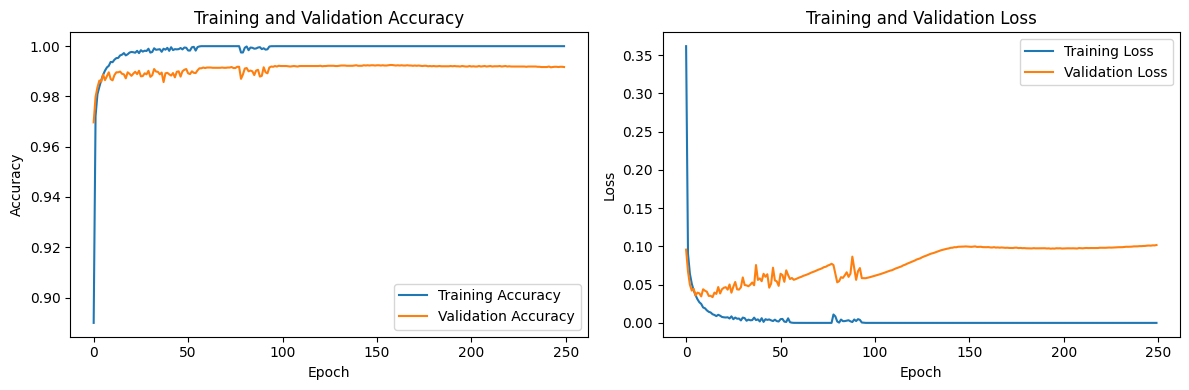

In [10]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### **saving the model and performing test accuracy**

In [11]:
model.save("mist.h5")

In [19]:
(_, _), (x_test, y_test) = mnist.load_data()

In [21]:
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1))

In [22]:
model = tf.keras.models.load_model('mist.h5')

In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [24]:
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.0974


###### **Calculating and printing the confusion matrix to better understand the model's prediction**

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
from IPython.display import display, HTML

In [31]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


In [32]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
num_classes = 10
metric_names = [f'Class {i}' for i in range(num_classes)]

In [43]:
df_cm = pd.DataFrame(cm, index=metric_names, columns=metric_names)

In [44]:
html_table = df_cm.style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]},
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px')]}
]).render()

<ipython-input-44-5bb3ea023407>:4: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  ]).render()


In [45]:
display(HTML(html_table))

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
Class 0,0,0,0,0,0,0,0,0,980,0
Class 1,0,0,0,0,0,0,0,0,1135,0
Class 2,0,0,0,0,0,0,0,0,1032,0
Class 3,0,0,0,0,0,0,0,0,1010,0
Class 4,0,0,0,0,0,0,0,0,982,0
Class 5,0,0,0,0,0,0,0,0,892,0
Class 6,0,0,0,0,0,0,0,0,958,0
Class 7,0,0,0,0,0,0,0,0,1028,0
Class 8,0,0,0,0,0,0,0,0,974,0
Class 9,0,0,0,0,0,0,0,0,1009,0
